<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/iris-multiclass-classification/blob/main/Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [132]:
df = pd.read_csv('/content/iris_synthetic_data.csv')
df

,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,Iris-setosa
1,5.3,4.1,1.5,0.1,Iris-setosa
2,4.8,3.1,1.5,0.2,Iris-setosa
3,5.2,3.7,1.5,0.2,Iris-setosa
4,4.9,3.0,1.5,0.3,Iris-setosa
...,...,...,...,...,...
2995,7.2,3.6,6.0,2.5,Iris-virginica
2996,7.3,3.0,6.2,2.1,Iris-virginica
2997,6.9,3.2,5.7,2.3,Iris-virginica
2998,7.5,2.8,6.0,2.0,Iris-virginica


In [133]:
le = LabelEncoder()
df['Target'] = le.fit_transform(df['label'])
df

,sepal length,sepal width,petal length,petal width,label,Target
0,5.2,3.8,1.5,0.3,Iris-setosa,0
1,5.3,4.1,1.5,0.1,Iris-setosa,0
2,4.8,3.1,1.5,0.2,Iris-setosa,0
3,5.2,3.7,1.5,0.2,Iris-setosa,0
4,4.9,3.0,1.5,0.3,Iris-setosa,0
...,...,...,...,...,...,...
2995,7.2,3.6,6.0,2.5,Iris-virginica,2
2996,7.3,3.0,6.2,2.1,Iris-virginica,2
2997,6.9,3.2,5.7,2.3,Iris-virginica,2
2998,7.5,2.8,6.0,2.0,Iris-virginica,2


In [134]:
data = df.drop(columns=['label'])
data

,sepal length,sepal width,petal length,petal width,Target
0,5.2,3.8,1.5,0.3,0
1,5.3,4.1,1.5,0.1,0
2,4.8,3.1,1.5,0.2,0
3,5.2,3.7,1.5,0.2,0
4,4.9,3.0,1.5,0.3,0
...,...,...,...,...,...
2995,7.2,3.6,6.0,2.5,2
2996,7.3,3.0,6.2,2.1,2
2997,6.9,3.2,5.7,2.3,2
2998,7.5,2.8,6.0,2.0,2


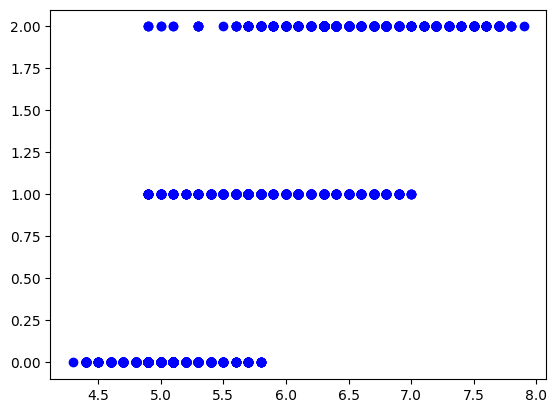

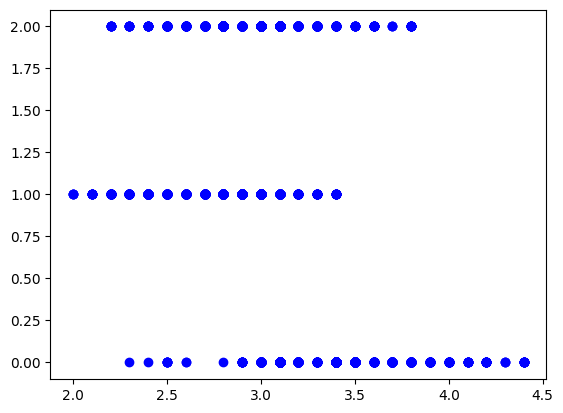

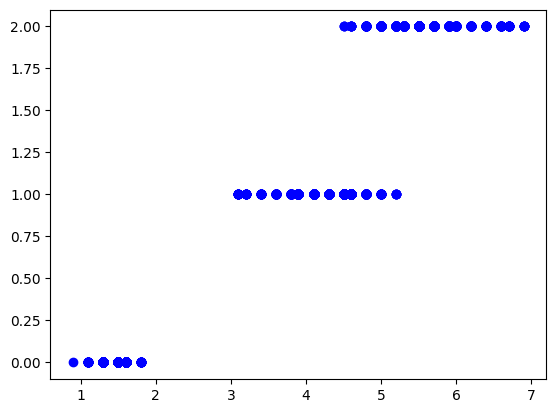

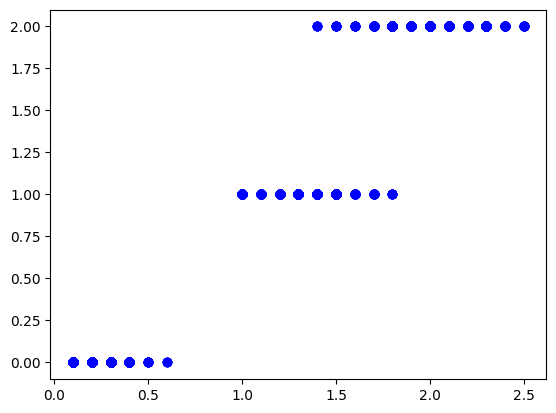

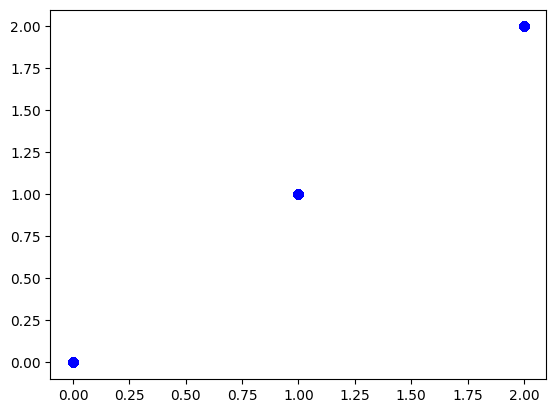

In [135]:
for i in data.columns:
  plt.scatter(data[i], data['Target'], c='b')
  plt.show()

In [136]:
X = data.drop(columns=['Target'])
y = data['Target']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [138]:
lr = LogisticRegression(multi_class='multinomial', max_iter=2000)

In [139]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=2000, multi_class='multinomial')

In [140]:
y_train_pred  = lr.predict(X_train)
print(y_train_pred)

[0 0 2 ... 1 1 0]


In [141]:
print(accuracy_score(y_train_pred, y_train))

0.9909523809523809


In [142]:
y_test_pred = lr.predict(X_test)
print(accuracy_score(y_test_pred, y_test))

0.9988888888888889


In [149]:
def softmax(z):
    ez = np.exp(z)
    sm = ez / np.sum(ez, axis=1, keepdims=True)
    return sm

In [144]:
def one_hot_encode(y, num_classes=None):
    if num_classes is None:
        num_classes = np.max(y) + 1
    one_hot = np.zeros((len(y), num_classes))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

In [145]:
def cross_entropy_loss(y, y_pred):
    y_one_hot = one_hot_encode(y, y_pred.shape[1])
    loss = -np.mean(np.sum(y_one_hot * np.log(y_pred), axis=1))
    return loss

In [146]:
def compute_gradients(X, y_one_hot, y_pred):
    m = X.shape[0]
    dj_dw = np.dot(X.T, (y_pred - y_one_hot)) / m
    dj_db = np.sum(y_pred - y_one_hot, axis=0, keepdims=True) / m
    return dj_dw, dj_db

In [147]:
def multi_class_classification(X, y, w_init, b_init, max_iter=1000, alpha_rate=0.01):
    w = w_init
    b = b_init
    for i in range(max_iter):
        z = np.dot(X, w) + b
        y_pred = softmax(z)
        y_one_hot = one_hot_encode(y, y_pred.shape[1])

        cost = cross_entropy_loss(y, y_pred)

        if i % 100 == 0:
          print(f'For Iteration {i} cost is {cost}')

        dj_dw, dj_db = compute_gradients(X, y_one_hot, y_pred)

        w = w - alpha_rate * dj_dw
        b = b - alpha_rate * dj_db

    return w, b

In [150]:
w,b = multi_class_classification(X_train, y_train, np.random.rand(X_train.shape[1],3), np.random.rand(1,3), 1000, 0.1)

For Iteration 0 cost is 2.5574392548511455
For Iteration 100 cost is 0.45393460807650765
For Iteration 200 cost is 0.2539206136945578
For Iteration 300 cost is 0.20794340226312327
For Iteration 400 cost is 0.1790635175204455
For Iteration 500 cost is 0.1591009490875027
For Iteration 600 cost is 0.1444465040838056
For Iteration 700 cost is 0.1332062630971939
For Iteration 800 cost is 0.12429240379799959
For Iteration 900 cost is 0.11703616213931155


In [157]:
def predict(X, w, b):
  y_pred = np.dot(X, w) + b
  sm = softmax(y_pred)
  return np.argmax(sm, axis=1)

In [158]:
y_train_pred = predict(X_train, w,b)
print(y_train_pred)

[0 0 2 ... 1 1 0]


In [159]:
accuracy_score(y_train_pred, y_train)

0.9866666666666667

In [160]:
y_test_pred = predict(X_test, w,b)
print(y_test_pred)

[1 1 1 0 2 1 1 2 0 2 2 0 0 1 2 0 1 0 2 2 0 0 0 2 1 2 2 1 0 1 1 1 0 2 0 0 2
 0 0 1 0 0 0 0 1 1 2 0 2 1 1 2 0 2 0 2 1 0 2 1 0 0 0 0 0 1 1 1 1 0 1 2 2 1
 0 0 2 2 2 2 1 1 0 1 2 0 2 1 2 2 0 1 2 1 1 0 2 2 0 1 2 0 0 1 1 0 1 0 0 1 2
 0 2 2 0 2 0 0 1 1 2 1 0 1 1 2 1 0 0 0 2 1 1 1 0 0 0 1 1 2 2 1 2 2 2 0 2 2
 2 0 1 2 0 2 0 1 0 2 1 2 1 1 0 0 1 1 0 2 2 0 2 2 1 0 2 1 2 1 0 1 0 2 1 2 0
 0 0 2 1 1 0 1 1 0 1 2 0 2 0 0 1 1 0 2 1 1 2 2 0 2 2 1 1 2 0 0 0 0 1 2 1 1
 0 2 1 0 0 2 1 0 1 1 2 0 0 1 0 1 2 0 2 0 2 1 0 0 1 0 0 2 1 1 0 1 2 2 1 2 2
 2 1 1 0 1 0 2 2 2 2 0 1 1 2 0 1 1 2 1 0 0 1 0 0 0 0 1 0 2 0 0 2 2 1 1 1 2
 0 2 2 0 0 1 0 1 2 0 1 1 1 0 0 1 0 2 1 2 0 2 1 1 1 0 2 2 1 1 0 2 2 2 0 1 1
 1 1 2 2 1 2 1 2 0 1 2 0 1 2 0 1 0 1 2 0 2 2 0 2 0 2 1 2 2 1 0 0 0 1 1 1 2
 0 0 1 1 0 1 1 1 0 1 0 2 0 0 0 2 1 0 0 1 2 1 1 1 2 1 0 0 0 2 0 2 1 2 2 1 0
 2 0 2 1 0 1 0 0 1 1 0 1 0 0 2 1 1 0 0 0 0 0 0 2 0 2 1 1 1 1 1 2 0 0 1 2 1
 2 0 2 2 0 2 2 1 2 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 2 0 2 2 0 2 2 2 2 1 1 2
 0 1 2 2 2 2 2 0 2 0 1 2 

In [161]:
accuracy_score(y_test_pred, y_test)

0.9955555555555555